# Regularized logistic regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plot_utils
from logistic_regressor import LogisticRegressor

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# This is a bit of magic to make matplotlib figures appear inline in the notebook
# rather than in a new window.
%matplotlib inline
plt.rcParams['figure.figsize'] = (15.0, 10.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

Plotting data with green circle indicating (y=1) examples and red circle indicating (y=0) examples ...


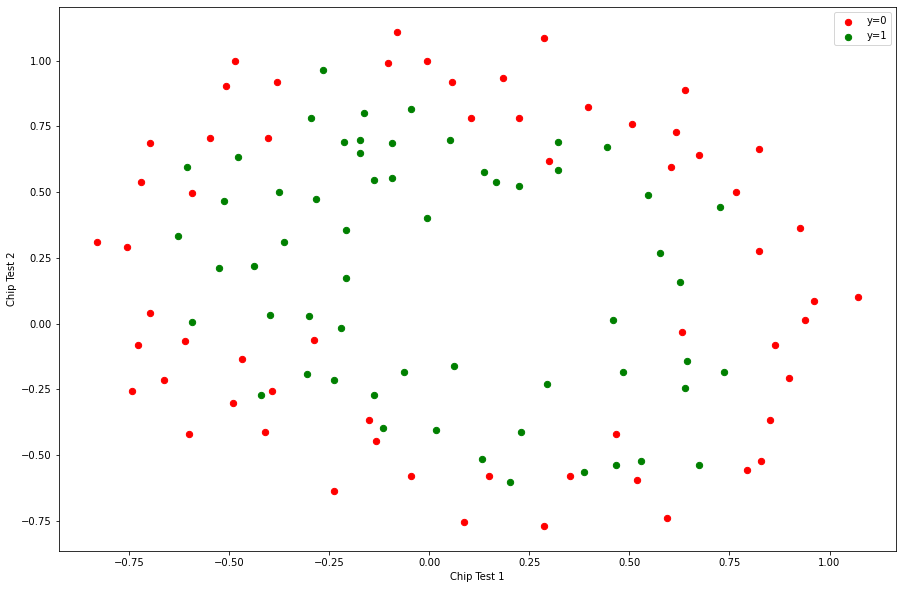

In [2]:
##================ Part 0: Reading data and plotting ==================#

import pandas as pd
import numpy as np

data = pd.read_csv('ex2data2.txt')
X = np.vstack([data.x1,data.x2]).T
y = data.y

print('Plotting data with green circle indicating (y=1) examples and red circle indicating (y=0) examples ...')
plot_utils.plot_twoclass_data(X,y,'Chip Test 1', 'Chip Test 2',['y=0','y=1'])
plt.show()

In [25]:
XX = np.vstack([np.ones((X.shape[0],)),X.T]).T
from logistic_regressor import RegLogisticRegressor
log_reg1 = RegLogisticRegressor()
theta = np.ones((XX.shape[1],))
loss = log_reg1.loss(theta,XX,y,100)
grad = log_reg1.grad_loss(theta,XX,y,100)

Optimization terminated successfully.
         Current function value: 0.529003
         Iterations: 47
         Function evaluations: 48
         Gradient evaluations: 48
Theta found by fmin_bfgs: [ 1.27268739  0.62557016  1.1809665  -2.01919822 -0.91761468 -1.43194199
  0.12375921 -0.36513086 -0.35703388 -0.17485805 -1.45843772 -0.05129676
 -0.61603963 -0.2746414  -1.19282569 -0.24270336 -0.20570022 -0.04499768
 -0.27782709 -0.29525851 -0.45613294 -1.04377851  0.02762813 -0.29265642
  0.01543393 -0.32759318 -0.14389199 -0.92460119]
Final loss = 0.4625


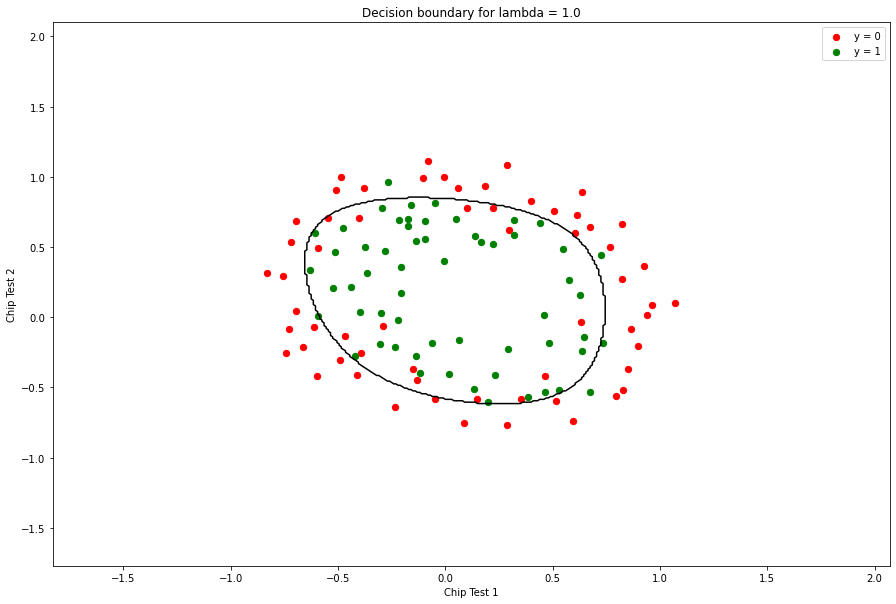

In [42]:
#================ Part 1: Compute cost and gradient ==================#
# open logistic_regressor.py and implement the regularized loss function 
# and gradient 

# map the features in ex2data2.txt into a pth order polynomial

import sklearn
from sklearn.preprocessing import PolynomialFeatures

# Map X onto polynomial features and normalize

p = 6
poly = sklearn.preprocessing.PolynomialFeatures(degree=p,include_bias=False)
X_poly = poly.fit_transform(X)

# set up the data matrix (expanded basis functions) with the column of ones as intercept

XX = np.vstack([np.ones((X_poly.shape[0],)),X_poly.T]).T

# set up a regularized logistic regression model

from logistic_regressor import RegLogisticRegressor

reg_lr1 = RegLogisticRegressor()

# run fmin on the loss function and gradient 

reg = 1.0
theta_opt = reg_lr1.train(XX,y,reg=reg,num_iters=1000,norm=False)

# print the theta found and the final loss

print('Theta found by fmin_bfgs: %s' %theta_opt)
print("Final loss = %.4f" %reg_lr1.loss(theta_opt,XX,y,0.0))

# plot the decision boundary

plot_utils.plot_decision_boundary_poly(X,y,theta_opt,reg,p,'Chip Test 1', 'Chip Test 2',['y = 0','y = 1'])
plt.show()


In [44]:
# compute accuracy on training set
# implement the predict method in logistic_regressor.py

reg_lr1.theta = theta_opt
predy = reg_lr1.predict(XX)

# TODO: fill in the expression for accuracy of prediction
accuracy = 1.0*np.sum((predy == y))/ predy.shape[0]
print("Accuracy on the training set = %.4f" %accuracy)

Accuracy on the training set = 0.8305


# Comparing learned model with sklearn's logistic ridge regression

Theta found by sklearn with L2 reg: [[ 1.1421394   0.60141117  1.16712554 -1.87160974 -0.91574144 -1.26966693
   0.12658629 -0.3686536  -0.34511687 -0.17368655 -1.42387465 -0.04870064
  -0.60646669 -0.26935562 -1.16303832 -0.24327026 -0.20702143 -0.04326335
  -0.28028058 -0.286921   -0.46908732 -1.03633961  0.02914775 -0.29263743
   0.01728096 -0.32898422 -0.13801971 -0.93196832]]
Loss with sklearn theta: 0.4684


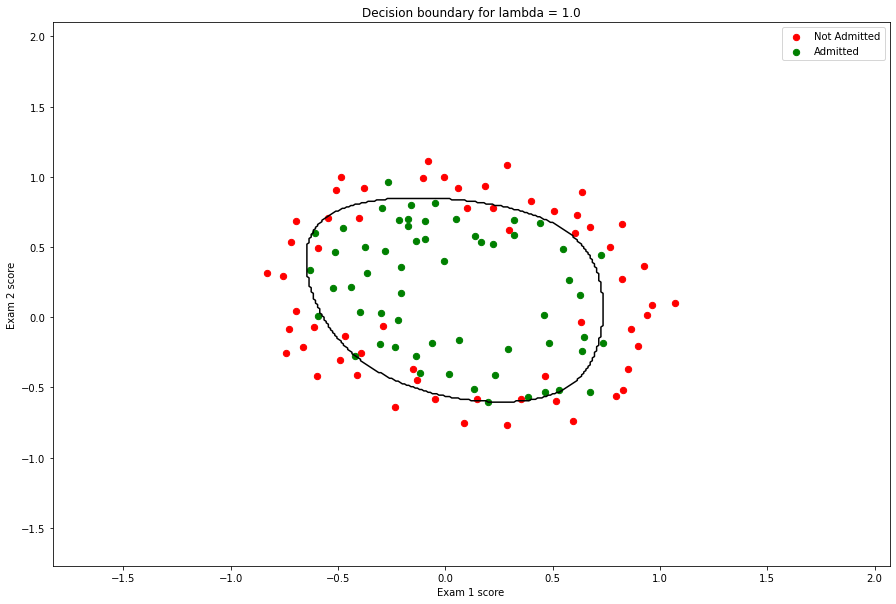

Computing regularization path ...


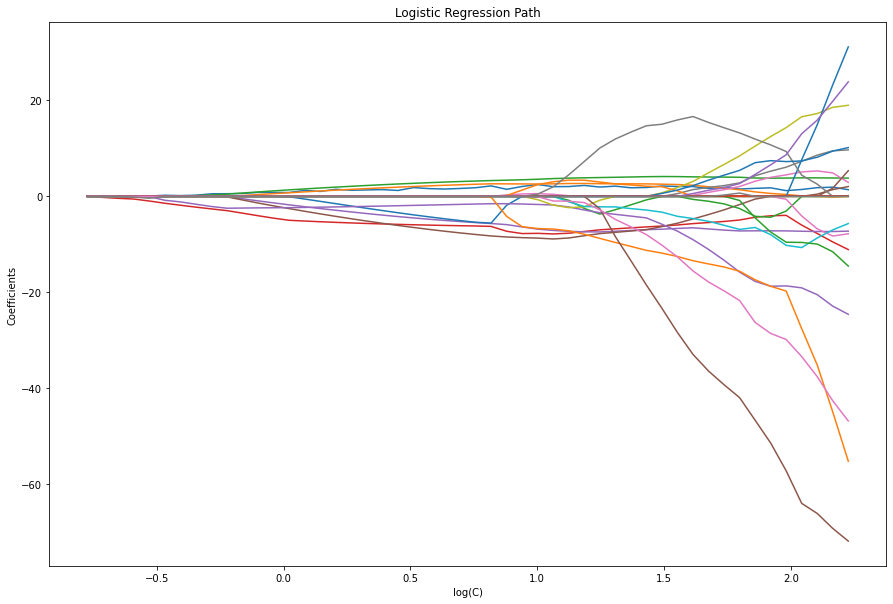

In [48]:
# Compare with model learned by sklearn's logistic regression with reg = 1/C
# the regularization parameter set below can be varied (on a logarithmic scale)

reg =1.0

# L2 regularization with sklearn LogisticRegression

from sklearn import linear_model
sk_logreg_l2 = linear_model.LogisticRegression(C=1.0/reg,solver='lbfgs',fit_intercept=False)
sk_logreg_l2.fit(XX,y)
print("Theta found by sklearn with L2 reg: %s" %sk_logreg_l2.coef_)
print("Loss with sklearn theta: %.4f" %reg_lr1.loss(sk_logreg_l2.coef_[0],XX,y,0.0))

plot_utils.plot_decision_boundary_sklearn_poly(X,y,sk_logreg_l2,reg,p,'Exam 1 score', 'Exam 2 score',['Not Admitted','Admitted'])
plt.show()

plot_utils.plot_regularization_path(XX,y)
plt.show()

# L1 regularized logistic regression

Theta found by sklearn with L1 reg: [[ 1.86946814  0.68653722  1.28035702 -4.86236101 -1.6216258  -2.3412705
   0.          0.          0.          0.          0.          0.
   0.          0.         -2.36834865  0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.        ]]
Loss with sklearn theta: 0.4382


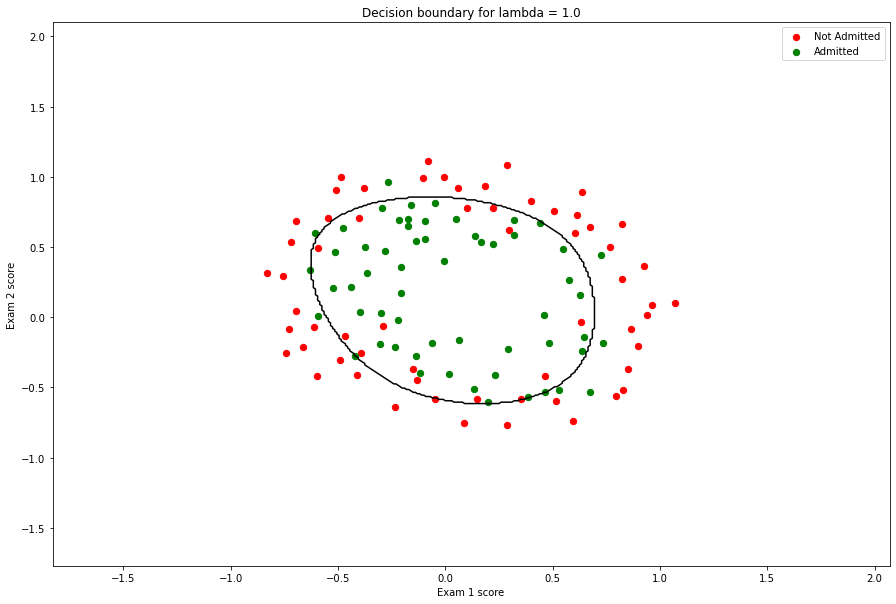

Computing regularization path ...


/Users/mikey/miniforge3/envs/enc_tensorflow/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


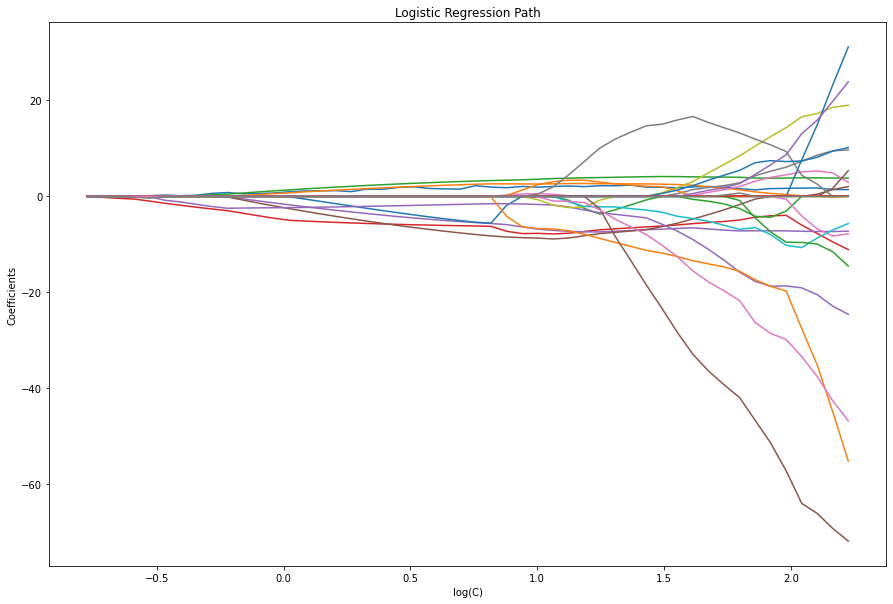

In [49]:
# L1 regularization witk sklearn LogisticRegression

sk_logreg_l1 = linear_model.LogisticRegression(C=1.0/reg,solver='liblinear',fit_intercept=False,penalty='l1')
sk_logreg_l1.fit(XX,y)
print("Theta found by sklearn with L1 reg: %s" %sk_logreg_l1.coef_)
print("Loss with sklearn theta: %.4f" %reg_lr1.loss(sk_logreg_l1.coef_[0],XX,y,0.0))

plot_utils.plot_decision_boundary_sklearn_poly(X,y,sk_logreg_l1,reg,p,'Exam 1 score', 'Exam 2 score',['Not Admitted','Admitted'])
plt.show()
# plot regularization paths for L1 regression
# Exploration of L1 regularization 
# 
plot_utils.plot_regularization_path(XX,y)
plt.show()